<a href="https://colab.research.google.com/github/nithish-ctrl/ML-Stuff/blob/main/Kiddos_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

https://youtu.be/My4JgIeFdWk?si=JQxf2O7TbUe3ECLY

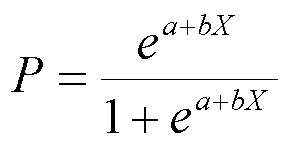

In [22]:
cancer = load_breast_cancer()
X = cancer.data   # 30 features (mean radius, mean texture, etc.)
y = cancer.target # Target: 0 (Malignant) or 1 (Benign)

In [23]:
print(f"Total number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {cancer.target_names}")


Total number of samples: 569
Number of features: 30
Target classes: ['malignant' 'benign']


In [24]:
# 2. Split Data into Training and Testing Sets
# We need to ensure the test set is unseen data!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y # stratify ensures balanced classes
)

In [26]:
# 3. Create and Train the Logistic Regression Model
# Using default parameters—the model finds the optimal weights.
model = LogisticRegression(max_iter=10000, random_state=70106)
# Note: Increased max_iter to ensure convergence due to the number of features.
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=70106)

In [27]:
# 4. Make Predictions on the Test Set
y_pred = model.predict(X_test)

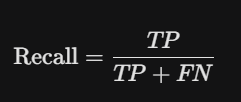

In [28]:
# 5. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

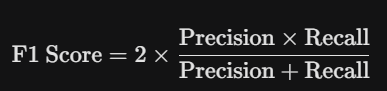


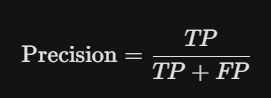

In [19]:
print(f"Model Accuracy on Test Set: {accuracy*100:.2f}%")
print("\nConfusion Matrix: (Correct predictions are on the diagonal)")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

Model Accuracy on Test Set: 95.80%

Confusion Matrix: (Correct predictions are on the diagonal)
[[48  5]
 [ 1 89]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        53
      benign       0.95      0.99      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [21]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the clean dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target  # 0: Malignant, 1: Benign

# Convert features to a DataFrame
feature_names = cancer.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Total Samples: {X.shape[0]}, Total Features: {X.shape[1]}")
print(f"Target distribution (0=Malignant, 1=Benign):\n{df['target'].value_counts()}")

#Scaling and Splitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Train the Model
print("3. Model Training")

# Create the Logistic Regression model
# Increased max_iter for convergence on standardized data
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=5000)

# Train the model
model.fit(X_train, y_train)

#Prediction and Evaluation
print("Evaluation (Metrics and Confusion Matrix)")

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of being Benign (class 1)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy*100:.2f}%")

# Confusion Matrix (TP, TN, FP, FN counts)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\n  [True Negative, False Positive]")
print("  [False Negative, True Positive]")

# Detailed Classification Report (Precision, Recall, F1 Score, Support)
print("\nClassification Report (Key Metrics):")
print(classification_report(
    y_test, y_pred, target_names=['Malignant (0)', 'Benign (1)']
))

Total Samples: 569, Total Features: 30
Target distribution (0=Malignant, 1=Benign):
target
1    357
0    212
Name: count, dtype: int64
Training set size: 426 samples
Testing set size: 143 samples
3. Model Training
Evaluation (Metrics and Confusion Matrix)
Accuracy Score: 98.60%

Confusion Matrix:
[[52  1]
 [ 1 89]]

  [True Negative, False Positive]
  [False Negative, True Positive]

Classification Report (Key Metrics):
               precision    recall  f1-score   support

Malignant (0)       0.98      0.98      0.98        53
   Benign (1)       0.99      0.99      0.99        90

     accuracy                           0.99       143
    macro avg       0.99      0.99      0.99       143
 weighted avg       0.99      0.99      0.99       143

